# Adaboost Example

In [10]:
using PyPlot
using ScikitLearn
using ScikitLearn.Utils: meshgrid
@sk_import datasets: make_moons

PyObject <function make_moons at 0x7fe111140430>

In [11]:
include("../src/adaboost.jl")

predict (generic function with 2 methods)

In [12]:
X = [[1.0 1.0]; [2.0 1.5]; [3.0 1.7]; [4.0 2.0];[5.0 3.5]; [6.0 4.0]; [7.0 4.5]]
y = [-1, 1, 1, -1, 1, -1, -1]

7-element Array{Int64,1}:
 -1
  1
  1
 -1
  1
 -1
 -1

In [13]:
weights = fill(1.0 / length(y), length(y))

7-element Array{Float64,1}:
 0.14285714285714285
 0.14285714285714285
 0.14285714285714285
 0.14285714285714285
 0.14285714285714285
 0.14285714285714285
 0.14285714285714285

In [14]:
stump = WeightedDecisionStump(X, y, weights)

WeightedDecisionStump(Node(1, false, nothing, 1, 3.5, Node(2, true, 1, nothing, nothing, nothing, nothing), Node(2, true, -1, nothing, nothing, nothing, nothing)))

In [15]:
predict(stump, X)

7-element Array{Float64,1}:
  1.0
  1.0
  1.0
 -1.0
 -1.0
 -1.0
 -1.0

In [16]:
ada_boost = AdaBoostModel(X, y, 5)

AdaBoostModel(5, WeightedDecisionStump[WeightedDecisionStump(Node(1, false, nothing, 1, 3.5, Node(2, true, 1, nothing, nothing, nothing, nothing), Node(2, true, -1, nothing, nothing, nothing, nothing))), WeightedDecisionStump(Node(1, false, nothing, 1, 1.5, Node(2, true, -1, nothing, nothing, nothing, nothing), Node(2, true, 1, nothing, nothing, nothing, nothing))), WeightedDecisionStump(Node(1, false, nothing, 1, 5.5, Node(2, true, 1, nothing, nothing, nothing, nothing), Node(2, true, -1, nothing, nothing, nothing, nothing))), WeightedDecisionStump(Node(1, false, nothing, 1, 4.5, Node(2, true, -1, nothing, nothing, nothing, nothing), Node(2, true, 1, nothing, nothing, nothing, nothing))), WeightedDecisionStump(Node(1, false, nothing, 1, 3.5, Node(2, true, 1, nothing, nothing, nothing, nothing), Node(2, true, -1, nothing, nothing, nothing, nothing)))], [0.9162907318741547, 0.8472978603872034, 0.6400373552459969, 0.559615787935423, 0.7985076962177718])

In [17]:
predict(ada_boost, X)

7-element Array{Float64,1}:
  1.0
  1.0
  1.0
 -1.0
  1.0
 -1.0
 -1.0

In [18]:
X, y = make_moons(200, noise=0.2)
y[y.==0] .= -1

function plot_result(tree_model, X, y)
    xx1 = range(minimum(X[:, 1]), maximum(X[:, 1]), length=101)
    xx2 = range(minimum(X[:, 2]), maximum(X[:, 2]), length=100)
    xxx1, xxx2 = meshgrid(xx1, xx2)
    Xtest = vcat([[x1 x2] for x1 in xx1 for x2 in xx2]...)

    yhat = predict(tree_model, Xtest);
    # julia reshape is column-major (1st dim is the dim of column)
    yhat_2d = reshape(yhat, (length(xx2), length(xx1)));

    plot(X[y.==1, 1], X[y.==1, 2], "o", label="1")
    plot(X[y.==-1, 1], X[y.==-1, 2], "o", label="-1")
    legend()
    pcolormesh(xxx1, xxx2, yhat_2d)
    colorbar()
end

plot_result (generic function with 1 method)

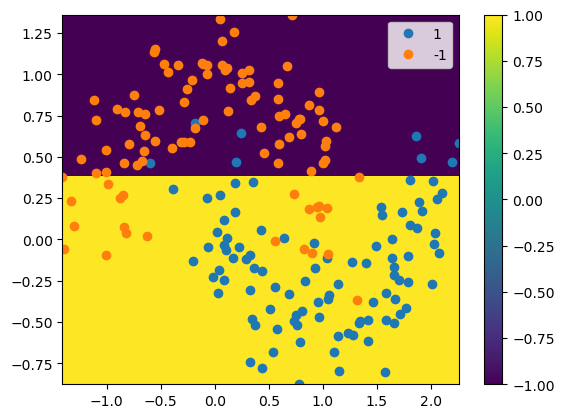

PyObject <matplotlib.colorbar.Colorbar object at 0x7fe1104b6700>

In [19]:
weights = fill(1.0/length(y), length(y))
stump = WeightedDecisionStump(X, y, weights)
plot_result(stump, X, y)

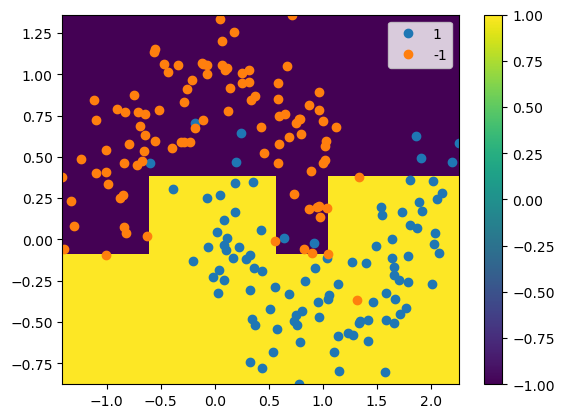

PyObject <matplotlib.colorbar.Colorbar object at 0x7fe10192c520>

In [20]:
ada_boost = AdaBoostModel(X, y, 5)
plot_result(ada_boost, X, y)

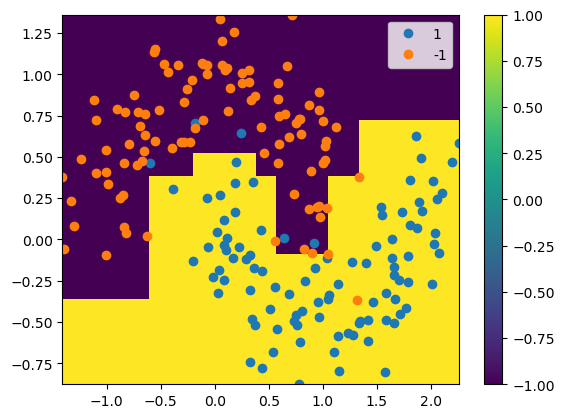

PyObject <matplotlib.colorbar.Colorbar object at 0x7fe1202437c0>

In [21]:
ada_boost = AdaBoostModel(X, y, 30)
plot_result(ada_boost, X, y)

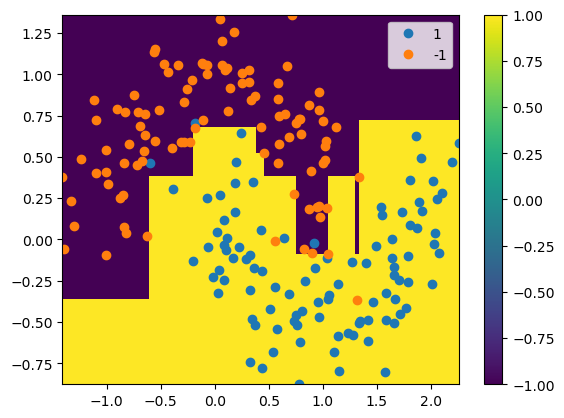

PyObject <matplotlib.colorbar.Colorbar object at 0x7fe0d071f910>

In [22]:
ada_boost = AdaBoostModel(X, y, 40)
plot_result(ada_boost, X, y)